In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math

In [58]:
dataset = sio.loadmat('anomalyData.mat')


In [59]:
X=dataset['X']


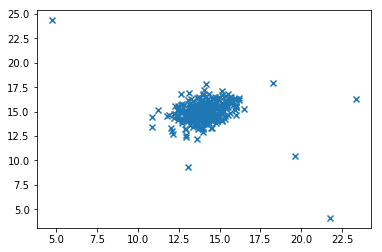

In [60]:
plt.scatter(X[:,0],X[:,1],marker="x")

In [61]:
def gaussdist(X):
    m=X.shape[0]      #no.of examples
    n=X.shape[1]      #no.of features
    mean=np.reshape((1/m)*np.sum(X, 0), (1, n))
    var=np.reshape((1/m)*np.sum(np.power((X - mean),2), 0),(1, n))
    
    return mean, var

mean,var = gaussdist(X)

In [76]:
print (mean)
print (var)

[[14.11222578 14.99771051]]
[[1.83263141 1.70974533]]


In [133]:
def multivariateGaussian(X,mean,var): 
    n = np.size(var, 1)
    m = np.size(var, 0)
    if n==1 or m==1:
        var=np.diag(var[0,:])
    vdet=np.linalg.det(var)
    vinv=np.linalg.inv(var)
    X=X-mean
    #print(X.shape)
    temp=np.dot(X,vinv)
    temp=temp*X
    temp=np.reshape((-0.5)*np.sum(temp,1),(np.size(X,0),1))
    #temp = np.reshape((-0.5)*np.sum(np.multiply((X@vinv),X), 1),(np.size(X, 0), 1))
   
    probs=np.power(2*math.pi,-n/2)*np.power(vdet,-0.5)*np.exp(temp)
    return probs
prev=multivariateGaussian(X,mean,var) 
#print(p.shape[0])
    

In [134]:
Xval=dataset['Xval']
yval=dataset['yval']
p=multivariateGaussian(Xval,mean,var)


In [135]:
def findthreshold(yval,p):
    step=(np.max(p) - np.min(p))
    step=step/1000
    epsilons=np.arange(np.min(p),np.max(p),step)
    
    f1=0
    maxf1=0
    maxep=0
    
    for i in range(len(epsilons)):
        epsilon=epsilons[i]
        prediction=(p<epsilon)
        precision=0
        recall=0
        tp,fp,fn=0,0,0
        
        for j in range(p.shape[0]):
            if (prediction[j]==1 and yval[j]==1):
                tp+=1
            elif (prediction[j]==1 and yval[j]==0):
                fp+=1
            elif (prediction[j]==0 and yval[j]==1):   
                fn+=1
        if(tp+fp!=0):
            precision=tp/(tp+fp)
        if(tp+fn!=0):
            recall=tp/(tp+fn) 
        if(precision+recall!=0):    
            f1=(2*precision*recall)/(precision+recall)  
        if (f1>maxf1):
            maxf1=f1
            maxep=epsilon
    return maxf1, maxep
F1, epsilon = findthreshold(yval, p)
#print('Epsilon and F1 are:',epsilon, F1)

In [136]:
prev=multivariateGaussian(X,mean,var) 
def findoutliers():
    list_outliers=[]
    arr=(prev<epsilon)
    count=0;
    for i in range(len(arr)):
        if(arr[i]):
            list_outliers.append(i);
            count+=1
    return count,list_outliers

c,le=findoutliers()
print (c)
print (le)

6
[300, 301, 303, 304, 305, 306]


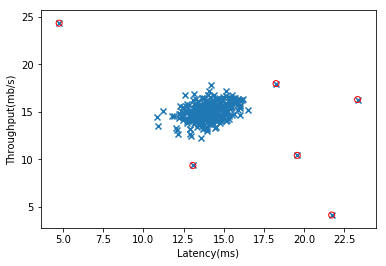

In [137]:
plt.scatter(X[:, 0], X[:, 1], marker = "x")
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')
plt.scatter(X[le,0], X[le, 1], facecolors = 'none', edgecolors = 'r')
plt.show()